In [30]:
#importing libaries


import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [31]:

#dataset path
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [32]:
data_dir

'.\\datasets\\flower_photos'

In [33]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [34]:
list(data_dir.glob('*/*.jpg'))[:10]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg')]

In [35]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

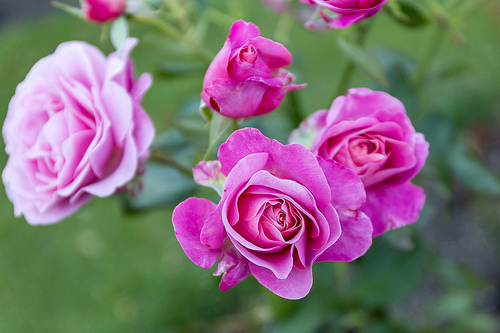

In [36]:
PIL.Image.open(str(roses[9]))

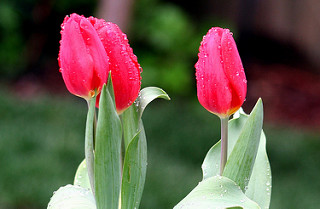

In [37]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [38]:
#Read flowers images from disk into numpy array using opencv
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [39]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [40]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [41]:
str(flowers_images_dict['roses'][2])

'datasets\\flower_photos\\roses\\10503217854_e66a804309.jpg'

In [42]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [43]:
img.shape

(240, 179, 3)

In [44]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [45]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [46]:
X = np.array(X)
y = np.array(y)

MemoryError: Unable to allocate 340. MiB for an array with shape (3670, 180, 180, 3) and data type uint8

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Preprocessing: scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
#Build convolutional neural network and train it
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)     

Epoch 1/30
86/86 [==============================] - 31s 327ms/step - loss: 1.3761 - accuracy: 0.4310
Epoch 2/30
86/86 [==============================] - 27s 317ms/step - loss: 0.9814 - accuracy: 0.6105
Epoch 3/30
86/86 [==============================] - 26s 299ms/step - loss: 0.8262 - accuracy: 0.6871
Epoch 4/30
86/86 [==============================] - 21s 251ms/step - loss: 0.0524 - accuracy: 0.9858
Epoch 10/30
86/86 [==============================] - 20s 236ms/step - loss: 0.0305 - accuracy: 0.9931
Epoch 11/30
86/86 [==============================] - 20s 237ms/step - loss: 0.0393 - accuracy: 0.9938
Epoch 12/30
86/86 [==============================] - 22s 252ms/step - loss: 0.0359 - accuracy: 0.9913
Epoch 13/30
86/86 [==============================] - 22s 251ms/step - loss: 0.0112 - accuracy: 0.9971
Epoch 14/30
86/86 [==============================] - 21s 244ms/step - loss: 0.0165 - accuracy: 0.9982
Epoch 15/30
86/86 [==============================] - 21s 248ms/step - loss: 0.0068 - a

In [21]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 87ms/step - loss: 2.3330 - accuracy: 0.6569


[2.3329570293426514, 0.656862735748291]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

In [ ]:
y_test[0]

In [ ]:
#
#Improve Test Accuracy Using Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

In [ ]:
model.evaluate(X_test_scaled,y_test)